# Прогнозирование кол-ва заказов такси 🚖

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, компании нужно прогнозировать количество заказов такси на следующий час, а нам необходимо построить модель для такого прогнозирования.

**Техническое задание**
- Значение метрики <tt>RMSE</tt> на тестовой выборке менее <tt>48</tt>;

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-предобработка-данных-🤨-⚙️" data-toc-modified-id="Обзор-и-предобработка-данных-🤨-⚙️-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и предобработка данных 🤨 ⚙️</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Получение-данных" data-toc-modified-id="Получение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Получение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Ресемплинг-данных" data-toc-modified-id="Ресемплинг-данных-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Ресемплинг данных</a></span></li><li><span><a href="#Добавление-признаков" data-toc-modified-id="Добавление-признаков-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Добавление признаков</a></span></li></ul></li><li><span><a href="#Итого" data-toc-modified-id="Итого-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Анализ-данных-📈" data-toc-modified-id="Анализ-данных-📈-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных 📈</a></span><ul class="toc-item"><li><span><a href="#Временные-зависимости" data-toc-modified-id="Временные-зависимости-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Временные зависимости</a></span></li><li><span><a href="#Количество-заказов,-скользящее-среднее-и-скользящее-отклонение" data-toc-modified-id="Количество-заказов,-скользящее-среднее-и-скользящее-отклонение-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Количество заказов, скользящее среднее и скользящее отклонение</a></span></li><li><span><a href="#Тренд-и-сезонность" data-toc-modified-id="Тренд-и-сезонность-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Тренд и сезонность</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Обучение-моделей-🦾" data-toc-modified-id="Обучение-моделей-🦾-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей 🦾</a></span><ul class="toc-item"><li><span><a href="#Тренировочная-и-тестовая-выборки" data-toc-modified-id="Тренировочная-и-тестовая-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Тренировочная и тестовая выборки</a></span></li><li><span><a href="#StandardScaler" data-toc-modified-id="StandardScaler-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>StandardScaler</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><tt>LinearRegression</tt></a></span></li><li><span><a href="#GradientBoostingRegressor" data-toc-modified-id="GradientBoostingRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span><tt>GradientBoostingRegressor</tt></a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span><tt>CatBoostRegressor</tt></a></span></li><li><span><a href="#Промежуточные-результаты-обучения-моделей" data-toc-modified-id="Промежуточные-результаты-обучения-моделей-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Промежуточные результаты обучения моделей</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Тестирование-модели-💯" data-toc-modified-id="Тестирование-модели-💯-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели 💯</a></span><ul class="toc-item"><li><span><a href="#Test-RMSE" data-toc-modified-id="Test-RMSE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Test RMSE</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Общий-вывод-👀" data-toc-modified-id="Общий-вывод-👀-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод 👀</a></span><ul class="toc-item"><li><span><a href="#Краткая-сводка-по-выполненным-задачам" data-toc-modified-id="Краткая-сводка-по-выполненным-задачам-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Краткая сводка по выполненным задачам</a></span><ul class="toc-item"><li><span><a href="#Шаг-1.-Обзор-и-предобработка-данных" data-toc-modified-id="Шаг-1.-Обзор-и-предобработка-данных-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Шаг 1. Обзор и предобработка данных</a></span></li><li><span><a href="#Шаг-2.-Анализ-данных" data-toc-modified-id="Шаг-2.-Анализ-данных-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Шаг 2. Анализ данных</a></span></li><li><span><a href="#Шаг-3.-Обучение-моделей" data-toc-modified-id="Шаг-3.-Обучение-моделей-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Шаг 3. Обучение моделей</a></span></li><li><span><a href="#Шаг-4.-Тестирование-модели" data-toc-modified-id="Шаг-4.-Тестирование-модели-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Шаг 4. Тестирование модели</a></span></li></ul></li></ul></li></ul></div>

## Обзор и предобработка данных 🤨 ⚙️

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor

from time import time
import urllib
import warnings
from IPython.display import HTML, display

%matplotlib inline

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:10,.2f}'.format

np.set_printoptions(suppress=True)

STATE = np.random.RandomState(42)

warnings.filterwarnings('ignore')

### Получение данных

In [2]:
label = 'taxi.csv'

pd_params = {
    'index_col': ['datetime'],
    'parse_dates': ['datetime']
}

try:
    data = pd.read_csv(
        f'https://code.s3.yandex.net/datasets/{label}', **pd_params)
    data.columns.name = label
    display(data.head(10))
    print('✅ Данные загружены с внешнего ресурса и успешно прочитаны')
except urllib.request.URLError:
    # Если отстутствует доступ к внешнему ресурсу с данными
    while True:
        data_name = input(
            'Укажите имя файла с данными в каталоге с проектом. '
            'Например: "data.csv".\n'
            'Если данные находятся не в каталоге с проектом нажмите Enter.\n\n'
        )
        if not data_name:
            while True:
                data_path = input('Введите абсолютный путь к датасету:\n')
                try:
                    data = pd.read_csv(data_path, **pd_params)
                    data.columns.name = data_path.split('/')[-1]
                    display(data.head(10))
                    print('✅ Исходные данные успешно прочитаны по указанному пути')

                    break

                except FileNotFoundError:  # Путь, указанный пользователем, неверный
                    raise Exception(
                        f'❌Указан неверный путь к файлу: {data_path}')
        else:
            data = pd.read_csv(data_name, **pd_params)
            data.columns.name = data_name
            display(data.head(10))
            print('✅ Исходные данные успешно прочитаны из каталога с проектом')
            break
        break

taxi.csv,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


✅ Данные загружены с внешнего ресурса и успешно прочитаны


### Предобработка данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Пропусков нет.

Данные отображают информацию о количестве заказов такси за **полгода**: начиная с <tt>1 марта 2018 года</tt> и заканчивая <tt>31 августа 2018 года</tt>.

taxi.csv,num_orders
count,"26,496.00"
mean,14.07
std,9.21
min,0.00
25%,8.00
50%,13.00
75%,19.00
max,119.00


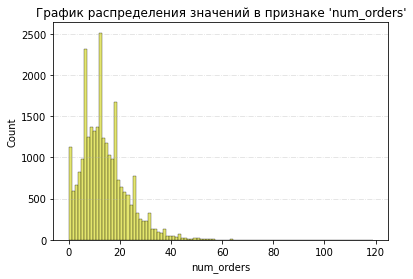

In [4]:
display(data.describe())

sns.histplot(data['num_orders'], bins=100, color='#dbde3e')
plt.title('График распределения значений в признаке \'num_orders\'')
plt.grid(alpha=.4, axis='y', linestyle='-.')

Распредение выглядит нормально, но есть резко выбивающиеся значения. Возможно, только что мы обнаружили какие-то тенденции в данных. Проверим это далее.

In [5]:
'✅ Данные отсортированы по дате' if data.index.is_monotonic else '❌ Данные не отсортированы по дате'

'✅ Данные отсортированы по дате'

#### Ресемплинг данных

С этим все отлично. 

Но смущает лишь то, что данные взяты с промежутком в 10 минут, а требуется спрогнозировать кол-во машин на следующий час, поэтому требуется ресемлировать данные. 

In [6]:
data = data.resample('1H').sum()

display(data.head())
data.shape

taxi.csv,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


(4416, 1)

Мало того, что объектов стало в примерно 6 раз меньше, так еще и графики будут получаться более удобочитаемыми!

#### Добавление признаков

Модель придется обучать, а на чем ее обучать, если в нашей выборке один признак - целевой?)

Стоит добавить следующие признаки:

- <tt>day</tt> | день месяца;
- <tt>month</tt> | номер месяца;
- <tt>hour</tt> | час дня;
- <tt>weekday</tt> | номер дня недели;
- <tt>weekend</tt> | выходной ли день (0/1);
- <tt>daytime</tt> | период дня: утро/день/вечер/ночь (0-3);
- <tt>day_orders</tt> | общее количество машин в конкретное время суток предыдущего дня (потребуется сдвиг на сутки);
- <tt>lag_{...}</tt> | отстающие значения;
- <tt>rolling_mean</tt> | скользящее среднее;
- <tt>rolling_std</tt> | скользящее стандартное отклонение.

In [7]:
def make_features(data, rolling_window_size=5, lag_amount=5):

    data_ = data.copy()

    data_['day'] = data_.index.day
    data_['month'] = data_.index.month
    data_['weekday'] = data_.index.weekday
    data_['weekend'] = data_['weekday'].apply(
        lambda x: 1 if x in [5, 6] else 0)

    daytimes_ = {0: range(0, 7),
                 1: range(7, 13),
                 2: range(13, 19),
                 3: range(19, 24)}

    def daytimes(x):
        for dt in daytimes_.keys():
            if x in daytimes_[dt]:
                return dt

    data['hour'] = data_.index.hour

    data_['daytime'] = data['hour'].apply(daytimes)

    data_['day_orders'] = data_['num_orders'].shift(24)

    for lag in range(1, lag_amount+1):
        data_[f'lag_{lag}'] = data_['num_orders'].shift(lag)

    if type(rolling_window_size) is list:
        for window_size in rolling_window_size:

            data_[f'rolling_mean_{window_size}'] = (
                data_['num_orders'].shift().rolling(window_size).mean())

            data_[f'rolling_std_{window_size}'] = (
                data_['num_orders'].shift().rolling(window_size).std())
    else:
        data_[f'rolling_mean_{rolling_window_size}'] = (
            data_['num_orders'].shift().rolling(rolling_window_size).mean())

        data_[f'rolling_std_{rolling_window_size}'] = (
            data_['num_orders'].shift().rolling(rolling_window_size).std())

    print('✅ Признаки успешно созданы')
    return data_

In [8]:
data = make_features(data, [5, 20], 10)

data.head(10)

✅ Признаки успешно созданы


taxi.csv,num_orders,day,month,weekday,weekend,daytime,day_orders,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,rolling_mean_5,rolling_std_5,rolling_mean_20,rolling_std_20
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,1,3,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,3,0,0,NaN,124.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,1,3,3,0,0,NaN,85.00,124.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,1,3,3,0,0,NaN,71.00,85.00,124.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,1,3,3,0,0,NaN,66.00,71.00,85.00,124.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 05:00:00,6,1,3,3,0,0,NaN,43.00,66.00,71.00,85.00,124.00,NaN,NaN,NaN,NaN,NaN,77.80,29.93,NaN,NaN
2018-03-01 06:00:00,12,1,3,3,0,0,NaN,6.00,43.00,66.00,71.00,85.00,124.00,NaN,NaN,NaN,NaN,54.20,30.90,NaN,NaN
2018-03-01 07:00:00,15,1,3,3,0,1,NaN,12.00,6.00,43.00,66.00,71.00,85.00,124.00,NaN,NaN,NaN,39.60,29.94,NaN,NaN
2018-03-01 08:00:00,34,1,3,3,0,1,NaN,15.00,12.00,6.00,43.00,66.00,71.00,85.00,124.00,NaN,NaN,28.40,25.38,NaN,NaN


После добавления признаков статистические показатели такие:

In [9]:
display(data.drop(columns=[f'lag_{i}' for i in range(1, 11)]).describe().T)

,count,mean,std,min,25%,50%,75%,max
taxi.csv,,,,,,,,
num_orders,"4,416.00",84.42,45.02,0.00,54.00,78.00,107.00,462.00
day,"4,416.00",15.84,8.86,1.00,8.00,16.00,23.25,31.00
month,"4,416.00",5.51,1.71,3.00,4.00,5.50,7.00,8.00
weekday,"4,416.00",3.01,1.99,0.00,1.00,3.00,5.00,6.00
weekend,"4,416.00",0.28,0.45,0.00,0.00,0.00,1.00,1.00
daytime,"4,416.00",1.38,1.11,0.00,0.00,1.00,2.00,3.00
day_orders,"4,392.00",83.97,44.50,0.00,54.00,78.00,107.00,462.00
rolling_mean_5,"4,411.00",84.35,34.30,16.00,61.60,78.80,102.60,286.20
rolling_std_5,"4,411.00",28.87,14.90,3.16,19.09,25.97,35.53,159.38


Матрица корреляции (в первую очередь, пользуясь ей, можно оценить силу связи добавленных "отстающих значений" (признаки lag_{...}) с реальными)

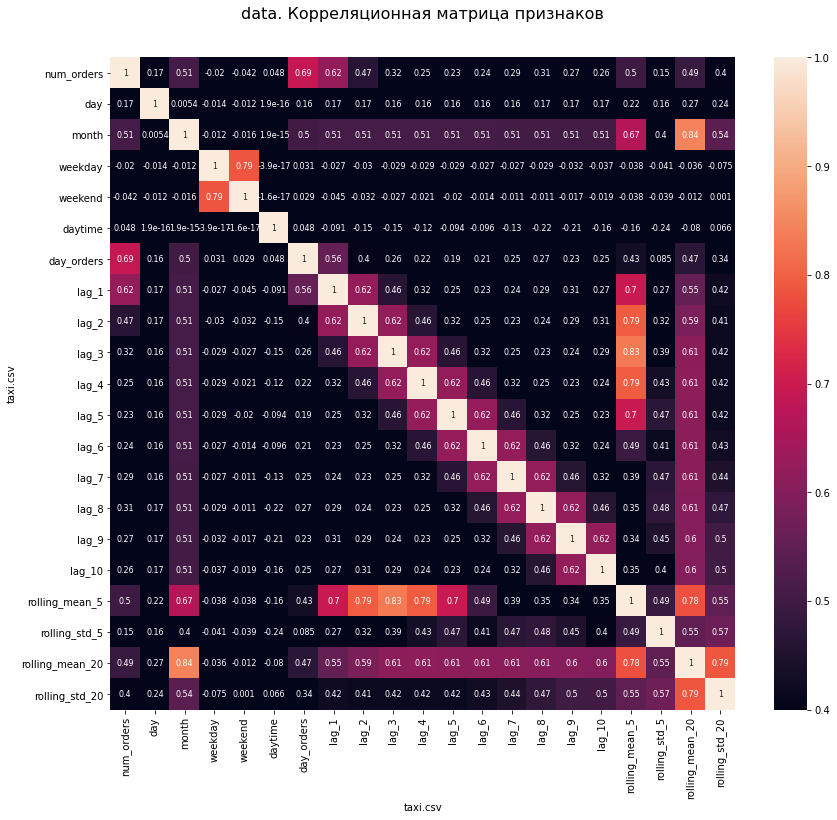

In [32]:
plt.figure(figsize=(14, 12))
plt.title('data. Корреляционная матрица признаков', y=1.05, fontsize=16)

sns.heatmap(data.corr(), annot=True, vmin=0.4, vmax=1, annot_kws={"fontsize": 8})

plt.show()

Как видно, <tt>lag_1</tt> и <tt>lag_2</tt> имеют довольно высокую положительную корреляцию с целевым признаком, что указывает на связь между тем, сколько заказов было в предыдущий день и тем, сколько заказов вероятно будет сегодня.

Однако, нормальному обучению моделей эти два признака могут помешать, так как приведут к возникновению утечки целевого признака вследствие мультиколлинеарности, поэтому их исключим и оставим все последующие "лаги" - у них корреляция меньше.

Также высокое значение коэффицентов корреляции прослеживается между обоими признаками <tt>rolling_mean_{...}</tt> и значением месяца (<tt>month</tt>). Вероятно, это свидетельствует о том, что у компании "Четенькое такси" постепенно растет клиентура.

<div style="border: 3px solid rgb(0,0,0); padding: 20px">
    
### Итого
    
- Проверили распределение величин целевого признака;
- Оценили временную монотонность данных;
- Ресемлировали данные с промежутком в 1 час;
- Добавили новые признаки с помощью функции <tt>make_features</tt>.

## Анализ данных 📈

Для начала посмотрим на то, как зависит среднее число заказов от определенного дня месяца, дня недели, самого месяца, времени суток и от того, выходной ли день.

### Временные зависимости

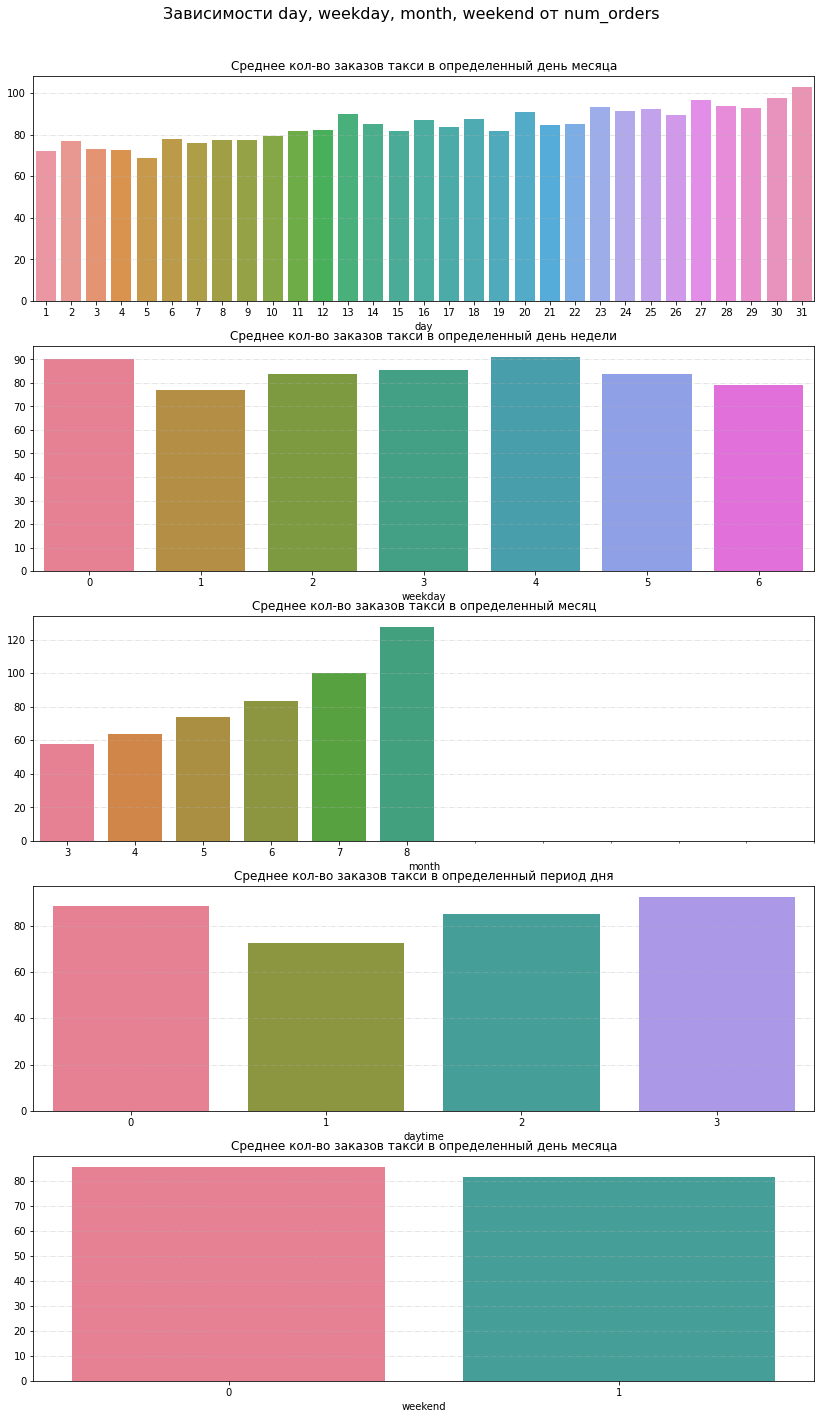

In [11]:
fig, ax = plt.subplots(5, 1, figsize=(14, 24))

fig.suptitle(
    'Зависимости day, weekday, month, weekend от num_orders', fontsize=16, y=0.92)


def groupby_splitter(gb_data):
    return gb_data.index, gb_data.values


ax0_x, ax0_y = groupby_splitter(data.groupby('day')['num_orders'].mean())

ax[0].set_title('Среднее кол-во заказов такси в определенный день месяца')
sns.barplot(x=ax0_x, y=ax0_y, ax=ax[0])
ax[0].grid(axis='y', alpha=0.4, linestyle='-.')

ax1_x, ax1_y = groupby_splitter(data.groupby('weekday')['num_orders'].mean())

ax[1].set_title('Среднее кол-во заказов такси в определенный день недели')
sns.barplot(x=ax1_x, y=ax1_y, ax=ax[1], palette=sns.color_palette("husl", 7))
ax[1].set_xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
ax[1].set_yticks(range(0, 100, 10))
ax[1].grid(axis='y', alpha=0.4, linestyle='-.')


ax2_x, ax2_y = groupby_splitter(data.groupby('month')['num_orders'].mean())

ax[2].set_title('Среднее кол-во заказов такси в определенный месяц')
sns.barplot(x=ax2_x, y=ax2_y, ax=ax[2], palette=sns.color_palette("husl", 12))
ax[2].set_xticks(range(12), ['Янв', 'Фев', 'Март', 'Апрель',
                 'Май', 'Июнь', 'Июль', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
ax[2].grid(axis='y', alpha=0.4, linestyle='-.')


ax3_x, ax3_y = groupby_splitter(data.groupby('daytime')['num_orders'].mean())

ax[3].set_title('Среднее кол-во заказов такси в определенный период дня')
sns.barplot(x=ax3_x, y=ax3_y, ax=ax[3], palette=sns.color_palette("husl", 4))
ax[3].set_xticks(range(4), ['Ночь', 'Утро', 'День', 'Вечер'])
ax[3].grid(axis='y', alpha=0.4, linestyle='-.')


ax4_x, ax4_y = groupby_splitter(data.groupby('weekend')['num_orders'].mean())

ax[4].set_title('Среднее кол-во заказов такси в определенный день месяца')
sns.barplot(x=ax4_x, y=ax4_y, ax=ax[4], palette=sns.color_palette("husl", 2))
ax[4].set_xticks(range(2), ['Будние', 'Выходные'])
ax[4].grid(axis='y', alpha=0.4, linestyle='-.')

plt.show()

- Количество заказов растет как и к концу месяца, так и в целом с каждым последующим месяцем;
- Наиболее успешные в плане количества заказов дни недели - понедельник и пятница. В целом, закономерно: любителей потусить на выходных, а в понедельник выходящих на работу довольно много;
- Предыдущая закономерность подтверждается и еще одним фактом: больше всего такси заказывают вечером и ночью;
- В будние больше заказов. Вероятно, это связано с тем, что понедельник и пятница наиболее популярные дни для многочисленных заказов такси, ну и, безусловно, с тем, что многие используют такси для рабочих поездок по городу.

---
### Количество заказов, скользящее среднее и скользящее отклонение


Теперь посмотрим на количество заказов на всем временном промежутке в данных, а также на скользящее среднее и стандартное отклонение:

In [1]:
fig = go.Figure(
    [
        go.Scatter(x=data.index, y=data.num_orders, name='Number of orders'),
        go.Scatter(x=data.index, y=data.rolling_mean_20,
                   name='Rolling mean with size 20'),
        go.Scatter(x=data.index, y=data.rolling_std_20,
                   name='Rolling std with size 20')
    ]
)

fig.update_layout(title='num_of_orders time series plot',
                  legend_title='Legend')

fig.show()

<img src='https://i.ibb.co/7WbxPQy/newplot.png'>

Виден тренд роста количества заказов. С ним увеличивается как и скользящее среднее, так и скользящее стандартное отклонение (прямо в самом конце временного промежутка), что в большей степени свидетельствует о том, что временной ряд является **нестационарным**.

Это не очень хорошо, так как прогнозировать значения таких рядов сложнее. Однако, как видно из графика, проблемы, присущие нестационарным рядам, начинают проявляться ближе к концу. До этого же, график вполне можно охарактеризовать как стационарный.

Будем иметь ввиду, что такой нюанс есть. Посмотрим далее по ситуации окажет ли он какое-либо влияние на качество прогноза.

---
### Тренд и сезонность

Движемся дальше и рассмотрим то, присутствует ли в данных какой-либо тренд, а также есть ли сезонные изменения количества заказов. Для этого воспользуемся удобной функцией разбивки данных из модуля <tt>statsmodels</tt> - <tt>seasonal_decompose()</tt>:

In [2]:
decompose = seasonal_decompose(data.num_orders)

fig = make_subplots(rows=3, 
                    cols=2, 
                    subplot_titles=('Trend full time', 
                                    'Trend last month', 
                                    'Seasonal full_time', 
                                    'Seasonal last month', 
                                    'Residue full time', 
                                    'Residue last month'))

fig.add_trace(go.Scatter(x=decompose.trend.index,
              y=decompose.trend), row=1, col=1)
fig.add_trace(go.Scatter(x=decompose.seasonal.index,
              y=decompose.seasonal), row=2, col=1)
fig.add_trace(go.Scatter(x=decompose.resid.index,
              y=decompose.resid), row=3, col=1)

fig.add_trace(go.Scatter(x=decompose.trend.tail(24*32).index,
              y=decompose.trend.tail(24*32)), row=1, col=2)
fig.add_trace(go.Scatter(x=decompose.seasonal.tail(24*32).index,
              y=decompose.seasonal.tail(24*32)), row=2, col=2)
fig.add_trace(go.Scatter(x=decompose.resid.tail(24*32).index,
              y=decompose.resid.tail(24*32)), row=3, col=2)

fig.update_layout(height=1000, 
                  width=1400, 
                  title='num_of_orders seasonal decompose', 
                  showlegend=False)

fig.show()

<img src='https://i.ibb.co/FYdLn25/newplot-1.png'>

- По-прежнему виден положительный тренд как на всем временном промежутке, так и в последний изучаемый месяц (при чем рост очень стремительный). Количество заказов увеличивается с течением времени;
- Интересная закономерность: в августе много пиковых значений в утреннее/дневное время (~7 ч. -16 ч.). Можно предположить, что в августе многие планируют отпуска и добираются туда и обратно на самолете, а поскольку рейсы часто выбирают ночные, то люди прилетают в аэропорт с утра или ближе к полудню и вызывают такси, чтобы доехать до дома;
- Присутствует сезонность, которая выражена в виде того, что чем ближе к вечернему времени, тем больше заказов;
- В остатках есть выбивающиеся значения. Возможно, в те дни были какие-то крупные тусовки и подобные мероприятия.

<div style="border: 3px solid rgb(0,0,0); padding: 20px">
    
### Итого
 
- Выявили закономерности на основании следующих графиков:
    - Среднее кол-во заказов такси в определенный день месяца;
    - Среднее кол-во заказов такси в определенный день недели;
    - Среднее кол-во заказов такси в определенный месяц;
    - Среднее кол-во заказов такси в определенный период дня;
    - Среднее кол-во заказов такси в определенный день месяца;
- Оценили стационарность временного ряда. Ряд - нестационарный;
- Рассмотрели присутствующие в данных тренд и сезонность за все время и за последний изучаемый месяц.

## Обучение моделей 🦾

Обучать будем следующие модели:

- <tt>LinearRegression</tt>;
- <tt>GradientBoostingRegressor</tt>;
- <tt>CatBoostRegressor</tt>

Из них выберем одну лучшую, которую и будем тестировать.

### Тренировочная и тестовая выборки

Для начала разделим данные на тренировочный, валидационный и тестовый наборы. Соотношение 6\:3:1.

Не забываем про <tt>shuffle=False</tt>, так как временная упорядоченность в данных важна. Стоит исключить объекты с пропусками, которые возникли по причине добавления <tt>lag features</tt>.

Ну и в конце удалим первые два <tt>lag features</tt> из выборки, так как присутствие данных признаков в выборке приведет к утечке целевого признака и, как следствие, к переобучению моделей.

In [14]:
train, test = train_test_split(data, test_size=.1, shuffle=False)
train.dropna(inplace=True)

X_train = train.drop(columns=[f'lag_{i}' for i in range(1, 3)] + ['num_orders'])
y_train = train['num_orders']

X_test = test.drop(columns=[f'lag_{i}' for i in range(1, 3)] + ['num_orders'])
y_test = test['num_orders']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3950, 18), (3950,), (442, 18), (442,))

### StandardScaler

Так как будут использоваться в том числе и линейные модели, то следует отмасштабировать признаки. Будем ипользовать <tt>StandardScaler</tt>

In [15]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(
    X_train), columns=X_train.columns, index=y_train.index)

X_test = pd.DataFrame(scaler.transform(
    X_test), columns=X_test.columns, index=y_test.index)

display(X_train.head())
display(X_test.head())

print(X_train.index.is_monotonic)
X_test.index.is_monotonic

taxi.csv,day,month,weekday,weekend,daytime,day_orders,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,rolling_mean_5,rolling_std_5,rolling_mean_20,rolling_std_20
datetime,,,,,,,,,,,,,,,,,,
2018-03-02 00:00:00,-1.49,-1.42,0.49,-0.64,-1.24,1.21,-0.32,-0.45,-0.86,-0.14,-0.89,-0.91,-0.32,-0.78,-0.35,-0.08,-1.37,-0.70
2018-03-02 01:00:00,-1.49,-1.42,0.49,-0.64,-1.24,0.19,0.90,-0.32,-0.45,-0.86,-0.14,-0.89,-0.91,-0.32,-0.03,-0.28,-1.25,-0.54
2018-03-02 02:00:00,-1.49,-1.42,0.49,-0.64,-1.24,-0.18,-0.53,0.90,-0.32,-0.45,-0.86,-0.14,-0.89,-0.91,0.39,0.04,-0.97,-0.37
2018-03-02 03:00:00,-1.49,-1.42,0.49,-0.64,-1.24,-0.31,0.30,-0.53,0.90,-0.32,-0.45,-0.86,-0.14,-0.89,0.46,-0.10,-0.81,-0.61
2018-03-02 04:00:00,-1.49,-1.42,0.49,-0.64,-1.24,-0.92,1.08,0.30,-0.53,0.90,-0.32,-0.45,-0.86,-0.14,0.11,-0.18,-0.68,-0.88


taxi.csv,day,month,weekday,weekend,daytime,day_orders,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,rolling_mean_5,rolling_std_5,rolling_mean_20,rolling_std_20
datetime,,,,,,,,,,,,,,,,,,
2018-08-13 14:00:00,-0.25,1.75,-1.51,-0.64,0.57,0.69,1.70,2.01,1.52,0.33,-1.02,-0.32,0.12,1.67,1.83,-0.17,3.11,6.48
2018-08-13 15:00:00,-0.25,1.75,-1.51,-0.64,0.57,1.87,0.35,1.70,2.01,1.52,0.33,-1.02,-0.32,0.12,1.58,0.01,3.17,6.39
2018-08-13 16:00:00,-0.25,1.75,-1.51,-0.64,0.57,1.97,1.05,0.35,1.70,2.01,1.52,0.33,-1.02,-0.32,1.72,0.52,3.40,6.28
2018-08-13 17:00:00,-0.25,1.75,-1.51,-0.64,0.57,0.98,0.61,1.05,0.35,1.70,2.01,1.52,0.33,-1.02,1.72,0.52,3.51,6.19
2018-08-13 18:00:00,-0.25,1.75,-1.51,-0.64,0.57,0.00,2.50,0.61,1.05,0.35,1.70,2.01,1.52,0.33,2.14,0.12,3.56,6.19


True


True

### <tt>LinearRegression</tt>

Зададим <tt>RMSE scorer</tt> для кросс-валидатора и <tt>GridSearchCV</tt>

In [16]:
rmse_scorer = make_scorer(mean_squared_error, squared=False)

Будет использоваться кросс-валидация. Поскольку работаем с временным рядом, то в качестве алгоритма проведения кросс-валидации будем использовать <tt>TimeSeriesSplit</tt> с разбивкой на 5 фолдов.

In [17]:
lr_stime = time()

lr = LinearRegression()

lr_cv = cross_val_score(lr,
                        X_train, 
                        y_train, 
                        cv=TimeSeriesSplit(n_splits=8), 
                        scoring=rmse_scorer, n_jobs=-1)

lr.fit(X_train, y_train)

lr_rmse = round(lr_cv.mean(), 2)

lr_full_time = round(time() - lr_stime, 2)

print(f'Linear Regression. Cross-val RMSE -> {lr_rmse}\n'
      f'Time elapsed -> {lr_full_time} с.')

Linear Regression. Cross-val RMSE -> 26.86
Time elapsed -> 0.25 с.


### <tt>GradientBoostingRegressor</tt>

In [18]:
def GS_best_params(model,
                   params_grid,
                   train_features,
                   train_target,
                   scorer=rmse_scorer,
                   cv_rate=8,
                   refit=True,
                   verbose=3,
                   n_jobs=-1):

    GS = GridSearchCV(model,
                      params_grid,
                      cv=TimeSeriesSplit(n_splits=cv_rate),
                      refit=refit,
                      scoring=scorer,
                      verbose=verbose,
                      n_jobs=n_jobs).fit(train_features, train_target)

    return GS

In [19]:
gbr_stime = time()

gbr = GradientBoostingRegressor(random_state=STATE)

gbr_params = {
    'n_estimators' : [300, 400, 500], 
    'learning_rate' : [0.01, 0.1, 0.5], 
    'max_depth' : [4, 5, 6]}

gbr_gs = GS_best_params(gbr, gbr_params, X_train, y_train)

gbr = gbr_gs.best_estimator_

gbr_rmse = round(gbr_gs.best_score_, 2)

gbr_full_time = round(time() - gbr_stime, 2)


print(f'GradientBoostingRegressor. Cross-val RMSE -> {gbr_rmse}\n'
      f'Time elapsed -> {gbr_full_time} с.')

Fitting 8 folds for each of 27 candidates, totalling 216 fits
[CV 1/8] END learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.7s
[CV 2/8] END learning_rate=0.01, max_depth=4, n_estimators=300; total time=   1.0s
[CV 3/8] END learning_rate=0.01, max_depth=4, n_estimators=300; total time=   2.0s
[CV 4/8] END learning_rate=0.01, max_depth=4, n_estimators=300; total time=   2.4s
[CV 5/8] END learning_rate=0.01, max_depth=4, n_estimators=300; total time=   2.4s
[CV 6/8] END learning_rate=0.01, max_depth=4, n_estimators=300; total time=   2.9s
[CV 7/8] END learning_rate=0.01, max_depth=4, n_estimators=300; total time=   3.3s
[CV 8/8] END learning_rate=0.01, max_depth=4, n_estimators=300; total time=   3.7s
[CV 1/8] END learning_rate=0.01, max_depth=4, n_estimators=400; total time=   0.8s
[CV 2/8] END learning_rate=0.01, max_depth=4, n_estimators=400; total time=   1.4s
[CV 3/8] END learning_rate=0.01, max_depth=4, n_estimators=400; total time=   2.0s
[CV 4/8] END learning_rat

### <tt>CatBoostRegressor</tt>

In [20]:
cbr_stime = time()

cbr = CatBoostRegressor(verbose=False, random_seed=42)

cbr_params = {
    'iterations': [300, 400],
    'learning_rate': [0.01, 0.5],
    'depth' : [4, 5, 6]
}

cbr_gs = GS_best_params(cbr, cbr_params, X_train, y_train)

cbr = cbr_gs.best_estimator_

cbr_rmse = round(cbr_gs.best_score_, 2)

cbr_full_time = round(time() - cbr_stime, 2)

print(f'CatBoostRegressor. Cross-val RMSE -> {cbr_rmse}\n'
      f'Time elapsed -> {cbr_full_time} с.')

Fitting 8 folds for each of 12 candidates, totalling 96 fits
[CV 1/8] END ....depth=4, iterations=300, learning_rate=0.01; total time=   1.2s
[CV 2/8] END ....depth=4, iterations=300, learning_rate=0.01; total time=   1.3s
[CV 3/8] END ....depth=4, iterations=300, learning_rate=0.01; total time=   1.5s
[CV 4/8] END ....depth=4, iterations=300, learning_rate=0.01; total time=   1.5s
[CV 5/8] END ....depth=4, iterations=300, learning_rate=0.01; total time=   1.6s
[CV 6/8] END ....depth=4, iterations=300, learning_rate=0.01; total time=   1.4s
[CV 7/8] END ....depth=4, iterations=300, learning_rate=0.01; total time=   1.3s
[CV 8/8] END ....depth=4, iterations=300, learning_rate=0.01; total time=   2.7s
[CV 1/8] END .....depth=4, iterations=300, learning_rate=0.5; total time=   1.1s
[CV 2/8] END .....depth=4, iterations=300, learning_rate=0.5; total time=   1.1s
[CV 3/8] END .....depth=4, iterations=300, learning_rate=0.5; total time=   1.2s
[CV 4/8] END .....depth=4, iterations=300, learn

### Промежуточные результаты обучения моделей

In [21]:
models_results = pd.DataFrame(
    {'Model': [
        'LinearRegression',
        'GradientBoostingRegressor',
        'CatBoostRegressor'],

     'Cross-val RMSE': [
         lr_rmse,
         gbr_rmse,
         cbr_rmse],

     'Time elapsed': [
         lr_full_time,
         gbr_full_time,
         cbr_full_time]
     }
)

models_results = models_results.sort_values(
    by='Cross-val RMSE', ascending=True)
models_results

,Model,Cross-val RMSE,Time elapsed
0,LinearRegression,26.86,0.25
2,CatBoostRegressor,28.04,167.32
1,GradientBoostingRegressor,30.32,773.34


<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого
    
Задачи по минимизации времени обучения модели нет, но если взять его в учет к тому, какое значение <tt>RMSE</tt> было получено в ходе кросс-валидации, то безоговорочную победу одерживает <tt>LinearRegresion</tt> (что довольно удивительно!)
    
Итого, для тестирования выбрали модель:   
    
<clear></clear>
    
<center><tt><code>LinearRegression()</code></tt></center>
    
    
</div>

## Тестирование модели 💯

### Test RMSE

In [25]:
model = lr
gs = None

if gs is not None and type(gs) is GridSearchCV:
    model_params = ', '.join(
        '='.join([str(key), str(val)]) for key, val in gs.best_params_.items())

model_preds = model.predict(X_test)

model_test_rmse = mean_squared_error(y_test, model_preds, squared=False)

if gs is not None and type(gs) is GridSearchCV:
    print(f'Model: {model}\n'
          f'Params: {model_params}\n'
          f'Test RMSE: {round(model_test_rmse, 2)}')
else:
    print(f'Model: {str(model)}\n'
          f'Test RMSE: {round(model_test_rmse, 2)}')

Model: LinearRegression()
Test RMSE: 46.81


Значение <tt>RMSE</tt> удовлетворяет минимально допустимому порогу в <tt>48</tt>, поэтому модель можно использовать.

Взглянем на визуализацию того, что же наша модель такого напредсказывала)

In [3]:
fig = go.Figure(
    [
        go.Scatter(x=y_test.index, y=y_test, name='Real values'),
        go.Scatter(x=X_test.index, y=model_preds,
                   name='GradientBoostingRegressor predictions'),
    ]
)

fig.update_layout(title='Model preds vs Real values comparison',
                  legend_title='Legend')

fig.show()

<img src='https://i.ibb.co/Y3Py38v/newplot-2.png'>

В общем-то наша модель учла то, что такси чаще всего заказывают именно после полуночи, либо в вечернее время.

Как видно, некоторые пиковые по количеству заказов периоды модель обрабатывает чуть занижая количество требуемых автомобилей, но все же это лучше, чем модель завышала бы это количество по вполне очевидным причинам.

Результат не идеальный, но под требования заказчика попадает (к тому же, работает она очень быстро). Следовательно, модель можно использовать, в чем мы убежадаемся во второй раз после визуального подтверждения требуемого качества модели.

### Проверка на адекватность

In [27]:
dr = DummyRegressor(strategy='mean')

dr.fit(X_train, y_train)
dr_test_preds = dr.predict(X_test)

dr_test_rmse = mean_squared_error(y_test, dr_test_preds, squared=False)

if dr_test_rmse > model_test_rmse:
    print(f'✅ Модель адекватна. Dummy Test RMSE -> {round(dr_test_rmse, 2)}')
else:
    print(f'❌ Модель не прошла проверку на адекватность')

✅ Модель адекватна. Dummy Test RMSE -> 84.65


<div style="border: 3px solid rgb(0,0,0); padding: 20px">

### Итого
    
Была выбрана модель <tt>LinearRegression()</tt>.
    
Модель прошла проверку на адекватность.
   
<clear></clear>
    
<div style="border: 3px solid rgb(255, 119, 119); padding: 20px">
<center><b>Значение RMSE на тестовой выборке составило - <tt>46.81</tt></b></center>
</div>
    
</div>

## Общий вывод 👀

<div style="border: 3px solid rgb(119,212,150); padding: 20px">
    
Для компании с беспрецедентно крутым названием "Чётенькое такси" была разработана модель машинного обучения для предсказания количества заказов автомобилей на следующий час. В техническом задании было указано, что требуется получить модель, которая на тестовой выборке покажет значение метрики <tt>RMSE</tt> менее <tt>48</tt>. Такую модель мы получили.
    
### Краткая сводка по выполненным задачам
    
    
#### Шаг 1. Обзор и предобработка данных
    
- Импортированы необходимые библиотеки;
- Данные загружены и прочитаны, предусмотрены альтернативные способы получения исходных данных;
- Оценена информация о данных;
- Выполнен ресемплинг данных;
- Добавлены дополнительные признаки;
    
#### Шаг 2. Анализ данных
    
- Рассмотрены и проанализированы временные зависимости в данных;
- Исследованы: скользящее среднее, скользящее стандартное отклонение и тренд роста количества заказов такси;
- Изучены присутствующие в данных тренд и сезонность;
    
#### Шаг 3. Обучение моделей
    
- Данные разделены на тренировочную и тестовую выборки. Соотношение 90:10 соответственно;
- Признаки отмасштабированы;

<center>Итоговая сводная таблица с результатами обучения моделей</center>
    
| Модель                    | Значение RMSE на кросс-валидации/GridSearchCV | Затраченное время (сек.) |
|---------------------------|-----------------------------------------------|--------------------------|
| LinearRegression          | 26.86                                         | 5.83                     |
| CatBoostRegressor         | 28.04                                         | 167.32                   |
| GradientBoostingRegressor | 30.32                                         | 773.34                   |
    
    
Была выбрана модель <tt>LinearRegression()</tt>
    
#### Шаг 4. Тестирование модели

- Модель была протестирована на тестовом наборе данных. Значение <tt>RMSE</tt> - <tt>46.81</tt>.
</div>